# (2) Regression
* team20(안지은, 이정윤)

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) ## 지수로 출력안하고 소수점 두자리까지 출력

import csv
import numpy as np
from tqdm import tqdm
import pickle

import plotly.express as px ## for visualization
from plotly.subplots import make_subplots
import seaborn as sns ## for visualization
import matplotlib.pyplot as plt ## for visualization

import statsmodels.api as sm
from sklearn.model_selection import train_test_split ## for spliting data

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_regression = pd.read_csv('./data/vehicles_prerocessing_final.csv', index_col=0)
df_regression.columns

Index(['index_original', 'year_original', 'make_original', 'vin_original',
       'condition_original', 'odometer_original', 'mmr_original',
       'sellingprice_original', 'year', 'condition', 'odometer', 'mmr',
       'sellingprice', 'sellingprice_log', 'odometer_log', 'mmr_log',
       'index_x', 'index_y', 'color', 'interior', 'K-Means_cluster'],
      dtype='object')

In [3]:
# numeric feature만 남기기
df_regression_num = df_regression[['year', 'condition', 'mmr', 'sellingprice', 'odometer']] 
df_regression_num.reset_index(inplace=True, drop=True)

In [13]:
# feature, target
feature = df_regression_num.drop(['sellingprice', 'mmr'], axis=1)
target = df_regression_num['sellingprice']

In [14]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=10)

In [15]:
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sellingprice   R-squared (uncentered):                   0.854
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                          6.804e+05
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        13:45:53   Log-Likelihood:                      2.1725e+05
No. Observations:              347988   AIC:                                 -4.345e+05
Df Residuals:                  347985   BIC:                                 -4.345e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year           0.2858      0.001    295.836      0.000       0.284       0.288
condition      0.2154      0.001    191.384      0.000       0.213       0.218
odometer      -0.2895      0.001   -287.975      0.000      -0.291      -0.288
==============================================================================
Omnibus:                    75656.056   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161741.322
Skew:                           1.271   Prob(JB):                         0.00
Kurtosis:                       5.166   Cond. No.                         7.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sellingprice   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          9.883e+06
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        13:38:37   Log-Likelihood:                      7.0702e+05
No. Observations:              347988   AIC:                                 -1.414e+06
Df Residuals:                  347984   BIC:                                 -1.414e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -0.0538      0.000   -193.855      0.000      -0.054      -0.053
condition      0.0831      0.000    295.556      0.000       0.083       0.084
mmr            0.9455      0.000   2336.711      0.000       0.945       0.946
odometer       0.0012      0.000      4.507      0.000       0.001       0.002
==============================================================================
Omnibus:                   116647.969   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8636508.062
Skew:                          -0.737   Prob(JB):                         0.00
Kurtosis:                      27.361   Cond. No.                         9.64
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
model = sm.OLS(target, feature)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           sellingprice   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.232e+07
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                        0.00
Time:                        13:38:37   Log-Likelihood:                      8.8317e+05
No. Observations:              434985   AIC:                                 -1.766e+06
Df Residuals:                  434981   BIC:                                 -1.766e+06
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
year          -0.0538      0.000   -216.266      0.000      -0.054      -0.053
condition      0.0834      0.000    330.932      0.000       0.083       0.084
mmr            0.9450      0.000   2605.674      0.000       0.944       0.946
odometer       0.0011      0.000      4.472      0.000       0.001       0.002
==============================================================================
Omnibus:                   146963.009   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10777954.577
Skew:                          -0.754   Prob(JB):                         0.00
Kurtosis:                      27.339   Cond. No.                         9.65
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_regression_num.values, i) for i in range(df_regression_num.shape[1])]
vif["features"] = df_regression_num.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,2.56,odometer
1,14.26,condition
2,19.81,year
3,114.28,sellingprice
4,114.34,mmr


In [39]:
result.predict(X_test)

12077    0.42
28895    0.05
245875   0.68
254988   0.62
10161    0.14
         ... 
308373   0.15
47697    0.12
68724    0.49
379026   0.28
95819    0.43
Length: 86997, dtype: float64

In [40]:
X_test

,year,condition,mmr,odometer
12077,0.96,0.65,0.44,0.09
28895,0.52,0.42,0.05,0.78
245875,0.80,0.88,0.68,0.12
254988,0.92,0.82,0.64,0.12
10161,0.72,0.22,0.17,0.46
...,...,...,...,...
308373,0.72,0.62,0.14,0.32
47697,0.72,0.22,0.15,0.44
68724,0.88,0.75,0.50,0.08
379026,0.76,0.68,0.28,0.25


In [38]:
## 모델 저장
with open('./model/ols_model_final.pkl', 'wb') as f:
    pickle.dump(result, f)

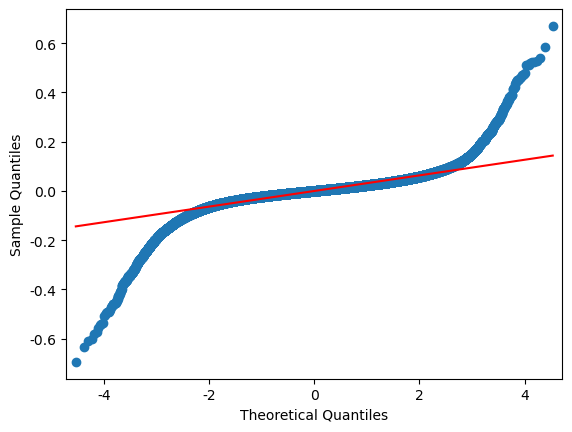

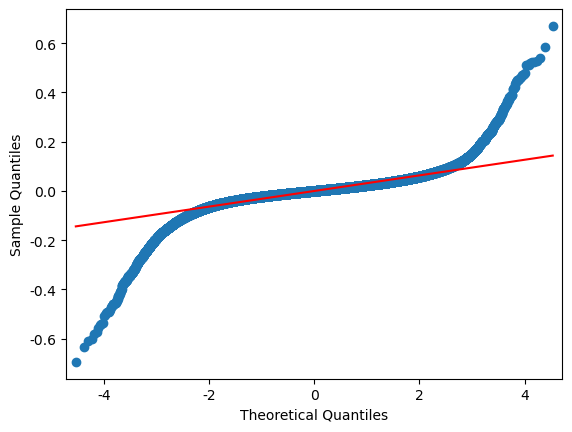

In [12]:
model_residuals = result.resid

plt.rcParams['axes.unicode_minus'] = False
sm.ProbPlot(model_residuals).qqplot(line='s')